## Supplemental analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
df_counts = utils.create_dataset()

(9788,)


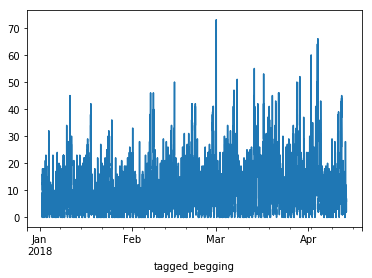

In [3]:
print(df_counts.shape)
ax = df_counts.plot()
plt.show()

In [19]:
# Create lagged dataset
values = pd.DataFrame(df_counts.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

   t-1 t+1
0  NaN   2
1    2   6
2    6   9
3    9   7
4    7   1


In [20]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [21]:
# persistence model
def model_persistence(x):
	return x

In [30]:
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
RMSE = sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
print('Test MSE: %.3f' % RMSE)
print('R2 score: %.3f' % r2)

Test MSE: 5.252
R2 score: 0.699


### Summary

A baseline model for the ETH request count data was created, using the Persistence method (using the value at time t for the prediction/forecast at time t+1). For simpicity, the baseline model was used to predict the t+1 time forecast (only)

The baseline model has t+1 MSE of 5.25 and R2 score of 0.699

The LSTM model from part 2 has t+1 RMSE of 5.14 and R2 score of 0.708. Note, in this case the model was run with 100 epochs

The model has since been run with 25 epochs, which improve the result to t+1 RMSE of 4.98 and R2 score of 0.733. Perhaps with 100 epochs there was overfitting of the data

-  Note, the R2 scores above from the LSTM model are aggregate of t+1, t+2, t+3, t+4 forecasts. R2 scores of t+1 only forecasts will be slightly higher, but will not materially affect the overall results

The LSTM model performs slightly better than the baseline model. Since the model used data that was differenced, the effects of autocorrelation have been removed and so the improvement of this model over that of the baseline can be attributed to the model's ability to detect patterns from the historical data (as well as perhaps additional elements of randomness due to  the stochastic nature of the neural net model)

Perhaps more tweaking of this model could improve results, and this would definitely be worthy of further time/effort, however there is a lot of existing research and results showing the effectiveness of this type of LSTM model on time series data as compared to other models such as ARIMA. The fact that this model only barely outperforms the baseline suggests the ETH request count dataset to have a high degree of stochasticity and thus has fundamental limits to how effective predictive forecasts on it can be